What's the error of the concentration field for all the learned R curves of all methods?

In [24]:
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [25]:
data_in_dir = Path("../data/")
data_out_dir = Path("../data_out/finn_first_running_intervals_stepsize_30_epochs_100")

In [26]:
finn_dirs = [
    p.parent
    for p in data_out_dir.rglob("c_predictions.npy")
    if "quantile" not in str(p)
]
print(len(finn_dirs))
print(np.load(finn_dirs[0] / "c_predictions.npy").shape)

12
(30, 2, 26, 1)


In [27]:
c_true = np.load(data_in_dir / "synthetic_data/retardation_freundlich/c_train.npy")[
    ..., None
]
print(c_true.shape)

(2001, 2, 26, 1)


In [28]:
import re


def natural_sort_key(s):
    """Key function for natural sorting."""
    return [
        int(text) if text.isdigit() else text.lower() for text in re.split("(\d+)", s)
    ]

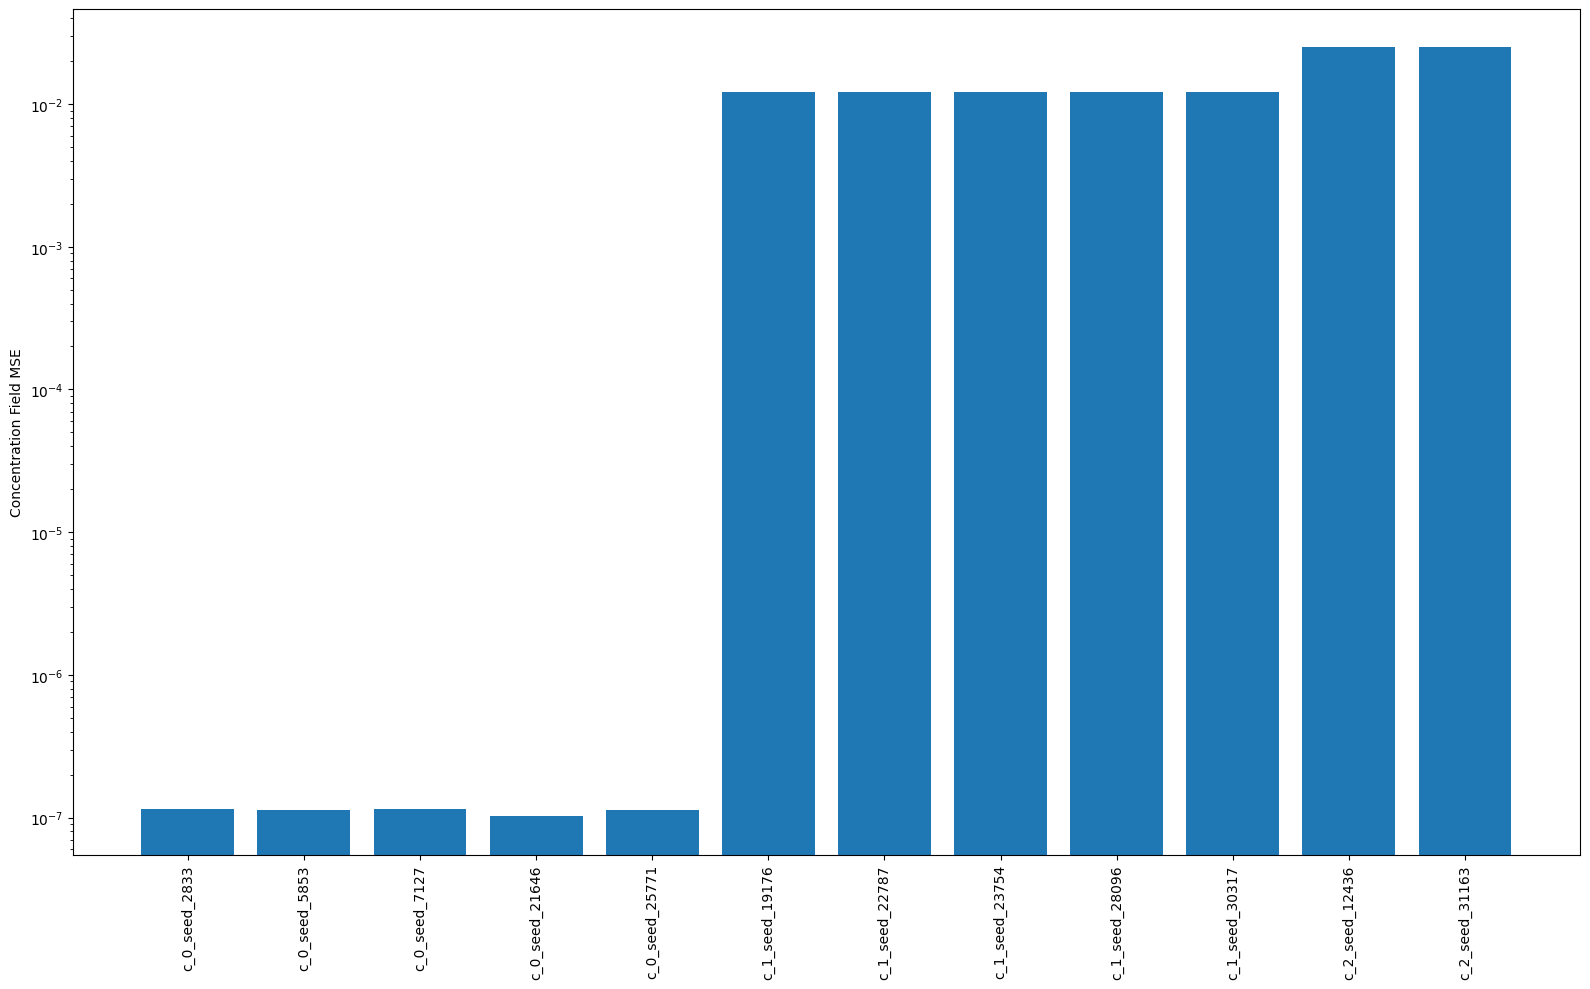

In [29]:
import matplotlib.pyplot as plt

df = {
    "finn_dir": finn_dirs,
    "label": [
        str(p.relative_to(data_out_dir)).replace("/c_predictions.npy", "")
        for p in finn_dirs
    ],
    "c_error": np.array(
        [
            np.mean(
                (
                    c_true[: np.load(p / "c_predictions.npy").shape[0]]
                    - np.load(p / "c_predictions.npy")
                )
                ** 2
            )
            for p in finn_dirs
        ]
    ),
}
categories = np.array(df["label"])
values = df["c_error"]

# sort_indices = np.argsort(values, axis=0)
# sort_indices = np.argsort(categories, axis=0)
sort_indices = np.array(
    [i for i, x in sorted(enumerate(categories), key=lambda x: natural_sort_key(x[1]))]
)
sorted_categories = [
    s.replace("/c_predictions.npy", "") for s in categories[sort_indices]
]
sorted_values = values[sort_indices]


plt.figure(figsize=(16, 10))
plt.bar(sorted_categories, sorted_values)
plt.xticks(rotation=90)
plt.ylabel("Concentration Field MSE")

plt.yscale("log")
plt.tight_layout()
plt.show()

# Retardations

In [31]:
df["ret_file_path"] = []
for finn_dir in df["finn_dir"]:
    ret_file_paths = list(finn_dir.rglob("retPred_*.npy"))
    if not ret_file_paths:
        print(f"No files found for {finn_dir}")
    ret_file_paths = sorted(ret_file_paths, key=lambda x: int(x.stem.split("_")[-1]))
    ret_file_path = ret_file_paths[-1]
    df["ret_file_path"].append(ret_file_path)
df = pd.DataFrame(df)
df

,experiment_dir,label,c_error,ret_file_path
0,../data_out/finn_first_running_intervals_steps...,c_2_seed_12436,2.491003e-02,../data_out/finn_first_running_intervals_steps...
1,../data_out/finn_first_running_intervals_steps...,c_2_seed_31163,2.491018e-02,../data_out/finn_first_running_intervals_steps...
2,../data_out/finn_first_running_intervals_steps...,c_1_seed_19176,1.213607e-02,../data_out/finn_first_running_intervals_steps...
3,../data_out/finn_first_running_intervals_steps...,c_1_seed_22787,1.213441e-02,../data_out/finn_first_running_intervals_steps...
4,../data_out/finn_first_running_intervals_steps...,c_0_seed_21646,1.024733e-07,../data_out/finn_first_running_intervals_steps...
5,../data_out/finn_first_running_intervals_steps...,c_0_seed_25771,1.124468e-07,../data_out/finn_first_running_intervals_steps...
6,../data_out/finn_first_running_intervals_steps...,c_1_seed_23754,1.213436e-02,../data_out/finn_first_running_intervals_steps...
7,../data_out/finn_first_running_intervals_steps...,c_1_seed_30317,1.213607e-02,../data_out/finn_first_running_intervals_steps...
8,../data_out/finn_first_running_intervals_steps...,c_1_seed_28096,1.213431e-02,../data_out/finn_first_running_intervals_steps...
9,../data_out/finn_first_running_intervals_steps...,c_0_seed_5853,1.131501e-07,../data_out/finn_first_running_intervals_steps...


In [39]:
df["interval"] = df["label"].apply(lambda x: int(x.split("_")[1]))

df2 = df.copy()
df2["ret"] = df["ret_file_path"].apply(lambda p: np.load(p).ravel())
df2 = df2.explode("ret").reset_index(drop=True)
df2["u"] = np.tile(np.arange(0, 100), len(df))

In [47]:
import seaborn as sns

<Figure size 640x480 with 0 Axes>

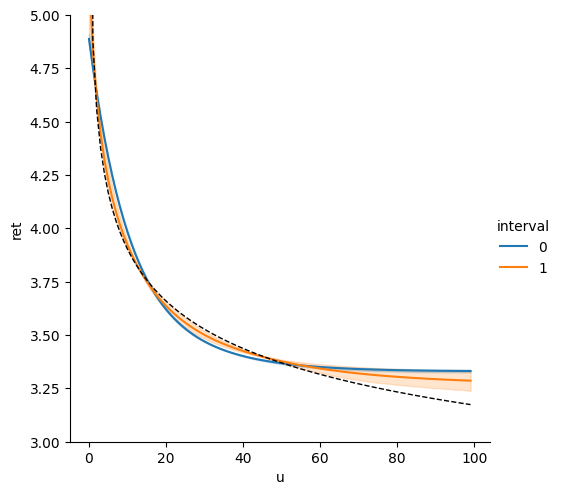

In [56]:
plt.figure()
sns.relplot(
    data=df2[np.logical_or(df2["interval"] == 0, df2["interval"] == 1)],
    kind="line",
    x="u",
    y="ret",
    hue="interval",
)

ret_freundlich = np.load("../data_out/default_finn/retardation_freundlich.npy")
plt.ylim(3, 5)
plt.plot(ret_freundlich, "k--", label="freundlich", linewidth=1)
plt.show()

<Figure size 640x480 with 0 Axes>

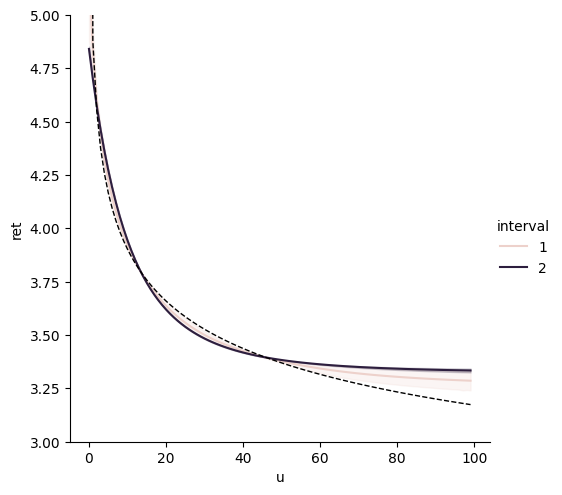

In [57]:
plt.figure()
sns.relplot(
    data=df2[np.logical_or(df2["interval"] == 1, df2["interval"] == 2)],
    kind="line",
    x="u",
    y="ret",
    hue="interval",
)

plt.ylim(3, 5)
plt.plot(ret_freundlich, "k--", label="freundlich", linewidth=1)
plt.show()

In [62]:
g.axes

array([[<Axes: title={'center': 'interval = 0'}, ylabel='ret'>],
       [<Axes: title={'center': 'interval = 1'}, ylabel='ret'>],
       [<Axes: title={'center': 'interval = 2'}, xlabel='u', ylabel='ret'>]],
      dtype=object)

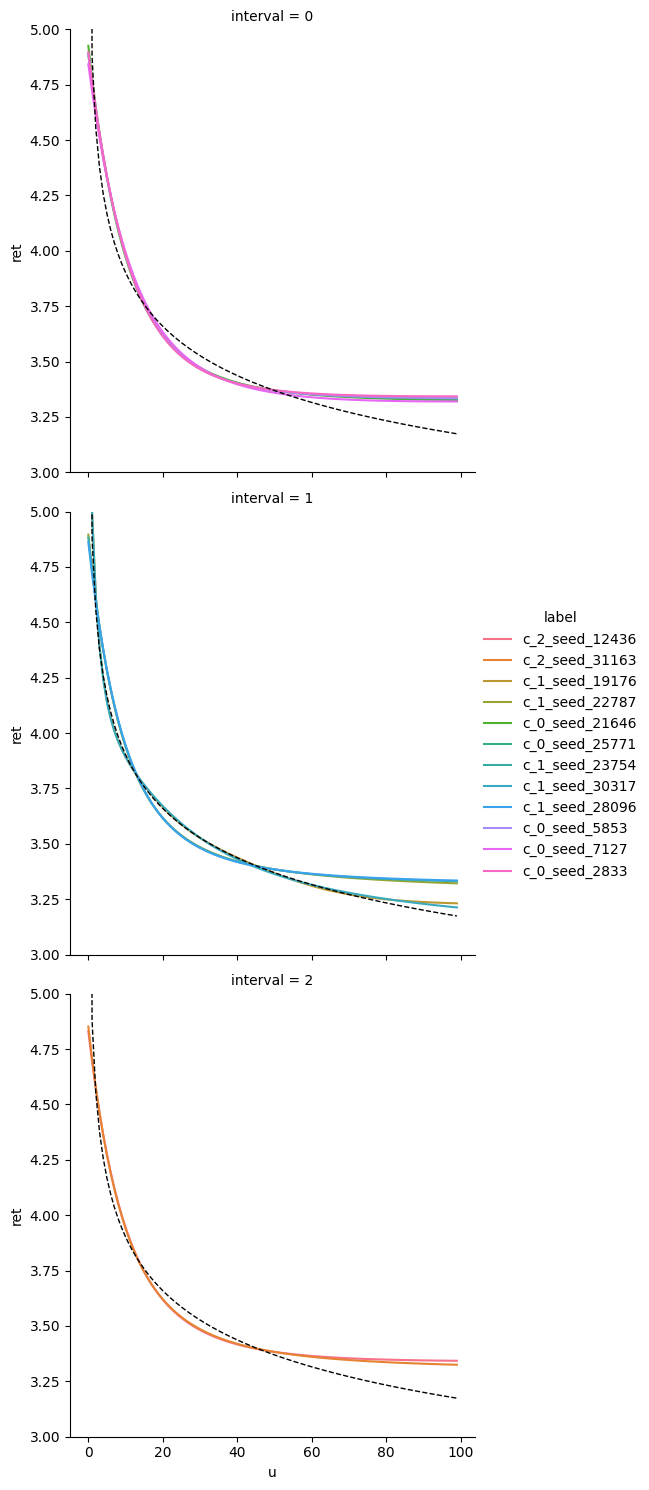

In [65]:
g = sns.relplot(
    data=df2,
    kind="line",
    x="u",
    y="ret",
    hue="label",
    row="interval",
)

# plot freundlich on every axis
for ax in g.axes.flat:
    ax.set_ylim(3, 5)
    ax.plot(ret_freundlich, "k--", label="freundlich", linewidth=1)


# fig, ax = plt.subplots()

# for i, ret_file_path in enumerate(df["ret_file_path"]):
#     ret = np.load(ret_file_path)
#     ax.plot(ret, label=df["label"][i])

# ax.legend()
# plt.show()